<h1><center>DS300: Take-home Quiz 3 - Ensemble Learning</center></h1>


## Introduction
In this exercise, we will be practicing with ensemble learning technique with a public dataset from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). We try to create a model to predict the risk of lending money to someone given a wide range of credit related data. We will use lending data from 2007-2010 and be trying to classify and predict **whether or not the borrower paid back their loan in full.**


## Dataset
Here are what the columns in the data set represent:

* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* **not.fully.paid**: The quantity of interest for classification - whether the borrower paid back the money in full or not

## Q1: Import Libraries and data set

#### Import the necessary libraries for pandas and plotting

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Get the Data: Use pandas to read `lending_club.csv`. 
#### Dataset URL: [link](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lending_club.csv)

In [3]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lending_club.csv'

In [4]:
df = pd.read_csv(url)



#### Check out the info(), head(), and describe() methods on the DataFrame

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()



,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.head()



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Q2: Find the Data Properties

#### Show all the missing data.

In [8]:
df.isna().sum()



credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Find the number of customers that meets the credit underwriting criteria versus NOT meeting the criteria. 

In [9]:
df['credit.policy'].value_counts()



1    7710
0    1868
Name: credit.policy, dtype: int64

#### Find if the labels of the Dataset are balanced.

In [10]:
df['not.fully.paid'].value_counts()



0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Q3: Exploratory Data Analysis

#### Plot the histogram of FICO scores by credit approval status

<AxesSubplot:xlabel='FICO score', ylabel='Count'>

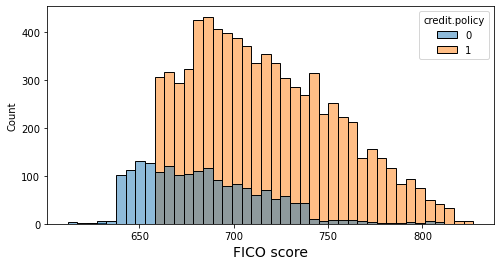

In [11]:
plt.figure(figsize=(8, 4))
plt.xlabel("FICO score", fontsize=14)

sns.histplot(data=df, x='fico', hue='credit.policy')




#### The impact of credit approval status on the interest rate. 

<AxesSubplot:xlabel='credit.policy', ylabel='int.rate'>

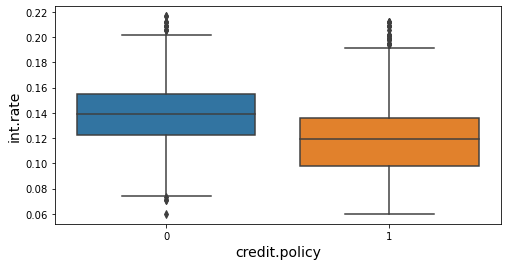

In [12]:
plt.figure(figsize=(8, 4))
plt.xlabel("Credit policy",fontsize=14)
plt.ylabel("Interest rate",fontsize=14)
sns.boxplot(data=df, x='credit.policy', y='int.rate')




#### Count the number of loans by each purpose, with the color hue defined by `not.fully.paid`

<AxesSubplot:title={'center':'Loan purpose colored by not fully paid status'}, xlabel='purpose', ylabel='count'>

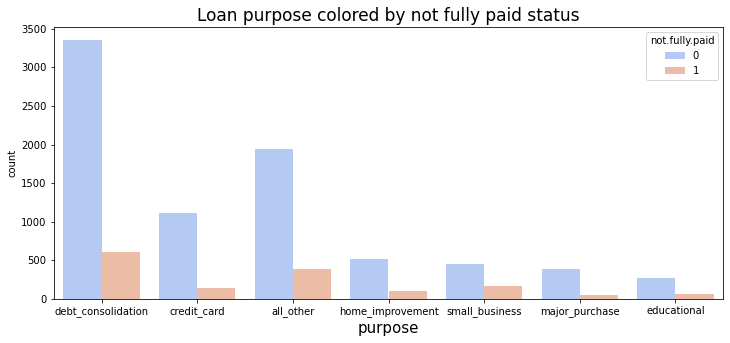

In [13]:
plt.figure(figsize=(12,5))
plt.title("Loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)
sns.countplot(x=df['purpose'], hue=df['not.fully.paid'], palette='coolwarm')



#### Trend between FICO score and interest rate,  with the color hue defined by `not.fully.paid`

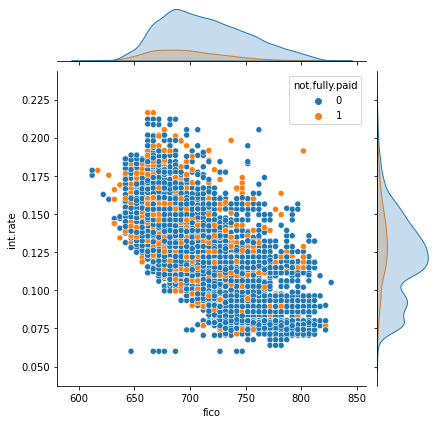

In [14]:
sns.jointplot(data = df, x = 'fico', y = 'int.rate', hue='not.fully.paid')

## Q4: Data Transformation
#### Transform categorical features. 

The **purpose** column is categorical. We need transform them using one-hot encoding.

In [15]:
# Import Class
from sklearn.preprocessing import OneHotEncoder


In [16]:
# Create onehot encoder object

onehot = OneHotEncoder(drop='first')


In [17]:
# Generate a new DataFrame named df_final that has transformed columns

X_onehot = df[['purpose']]
X_onehot = onehot.fit_transform(X_onehot.values)



In [18]:
X_onehot = pd.DataFrame(data=X_onehot.toarray(), 
                        columns=onehot.get_feature_names_out())

In [19]:
df[onehot.get_feature_names_out()] = X_onehot

In [20]:
df.drop('purpose', axis=1, inplace=True)

In [21]:
df_final = df

In [22]:
# Display the new DataFrame
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,x0_credit_card,x0_debt_consolidation,x0_educational,x0_home_improvement,x0_major_purchase,x0_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


## Q5: Train Test Split

Use 20% testing size and random seed as 101.

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = df_final.drop('not.fully.paid', axis=1)

y = df_final['not.fully.paid']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
# Display the shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(7662, 18)
(7662,)


## Q6: Training a Decision Tree Model

#### Create an instance of DecisionTreeClassifier() with all default parameters called `dt` and fit it to the training data. Use random seed as 101.

In [27]:
# Import class
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [28]:
# Create classifier object and train it
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)



#### Create predictions from the test set and create a classification report and a confusion matrix

In [29]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1623
           1       0.19      0.23      0.21       293

    accuracy                           0.74      1916
   macro avg       0.52      0.53      0.53      1916
weighted avg       0.75      0.74      0.75      1916

[[1348  275]
 [ 227   66]]


## Q7: Improve the Decision Tree with Boosting

#### Use 600 "stumps" to repeat the aforementioned classification. Use learning rate as 1.0 and random seed as 101.

In [30]:
# Import Class
from sklearn.ensemble import AdaBoostClassifier

In [31]:
# Create estimator, train it and make predictions. 
clf = AdaBoostClassifier(n_estimators=600, learning_rate=1.0, random_state=101)
clf.fit(X_train, y_train)
ab_pred = clf.predict(X_test)




In [32]:
print(classification_report(y_test, ab_pred))
print(confusion_matrix(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1623
           1       0.32      0.07      0.11       293

    accuracy                           0.84      1916
   macro avg       0.59      0.52      0.51      1916
weighted avg       0.77      0.84      0.79      1916

[[1581   42]
 [ 273   20]]


## Q8: Training the Random Forest model

#### Create an instance of the RandomForestClassifier() class and fit it to our training data. Use 600 weak learners, and set the max depth as 5. 

In [33]:
# Import Class
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Create estimator, train it and make predictions. 
rf = RandomForestClassifier(n_estimators=600, max_depth=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))





              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       293

    accuracy                           0.85      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.72      0.85      0.78      1916

[[1622    1]
 [ 293    0]]


#### Do you get anything strange or some sort of warnings from Q6-Q8? Write it down using the cell below.

#### Your Answer:


I didn't get any warnings from those questions.

## Q9: Iterative Study

#### With the findings from the last question, fix the defects in our existing approach, then re-train a AdaBoost model to compare the results. You MUST consider the following aspects:

+ Dataset imbalance issue
+ Data transformation
+ Data model fine-tuning

#### First I will try to down-sample the majority group (label 0) and up-sample the minority group (label 1) so that both groups will have exactly 4,000 data records.

In [35]:
from sklearn.utils import resample

In [36]:
df_1 = df_final[df_final['credit.policy']==1]
df_0 = df_final[df_final['credit.policy']!=1]

In [37]:
df_0_resample = resample(df_0, n_samples= 4000, replace=True, random_state=101)
df_1_resample = resample(df_1, n_samples= 4000, replace=False, random_state=101)

In [38]:
df_resampled = pd.concat([df_0_resample, df_1_resample])

In [39]:
X_resamp = df_resampled.drop('not.fully.paid', axis=1)

y_resamp = df_resampled['not.fully.paid']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, test_size=0.2, random_state=101)

In [41]:
clf = AdaBoostClassifier(n_estimators=600, learning_rate=1.0, random_state=101)
clf.fit(X_train, y_train)
ab_pred = clf.predict(X_test)
print(classification_report(y_test, ab_pred))
print(confusion_matrix(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1246
           1       0.71      0.19      0.30       354

    accuracy                           0.80      1600
   macro avg       0.76      0.58      0.59      1600
weighted avg       0.79      0.80      0.76      1600

[[1219   27]
 [ 287   67]]


#### Now we will look into transforming the data

In [42]:
from sklearn import preprocessing

In [45]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
clf = AdaBoostClassifier(n_estimators=600, learning_rate=1.0, random_state=101)
clf.fit(scaler, y_train)
ab_pred = clf.predict(X_test)
print(classification_report(y_test, ab_pred))
print(confusion_matrix(y_test, ab_pred))

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Now we will look into model fine-tuning

In [255]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=600, learning_rate=1.0, random_state=101)
clf.fit(X_train, y_train)
ab_pred = clf.predict(X_test)
print(classification_report(y_test, ab_pred))
print(confusion_matrix(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1246
           1       0.96      0.60      0.74       354

    accuracy                           0.91      1600
   macro avg       0.93      0.80      0.84      1600
weighted avg       0.91      0.91      0.90      1600

[[1237    9]
 [ 141  213]]
